#### Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from rutil import pystr
import pltflow.charts as flow

#### Load datasets 

In [2]:
boston = (
    pd.read_csv("../toy_datasets/boston_housing.csv")
    .loc[:,["Id","1stFlrSF","2ndFlrSF","YrSold","Neighborhood","SalePrice"]]
    .assign(
        total_sqm = lambda df: (df["1stFlrSF"] + df["2ndFlrSF"])*0.093,
        ppsqm = lambda df: df.SalePrice /   df.total_sqm 
        )
    
)
pystr(boston)

Pandas DataFrame 1460 obs. of 8 variables
$ Id                : int64        1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...
$ 1stFlrSF          : int64        856, 1262, 920, 961, 1145, 796, 1694, 1107, 1022, 1077, 1040, 1182, 912, 14...
$ 2ndFlrSF          : int64        854, 0, 866, 756, 1053, 566, 0, 983, 752, 0, 0, 1142, 0, 0, 0, 0, 0, 0, 0, ...
$ YrSold            : int64        2008, 2007, 2008, 2006, 2008, 2009, 2007, 2009, 2008, 2008, 2008, 2006, 200...
$ Neighborhood      : str          "CollgCr", "Veenker", "CollgCr", "Crawfor", "NoRidge", "Mitchel", "Somerst"...
$ SalePrice         : int64        208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118...
$ total_sqm         : float64      159.03, 117.366, 166.09799999999998, 159.681, 204.414, 126.666, 157.542, 19...
$ ppsqm             : float64      1311.073382380683, 1546.4444558049179, 1345.591157027779, 876.748016357613,...


#### Plots

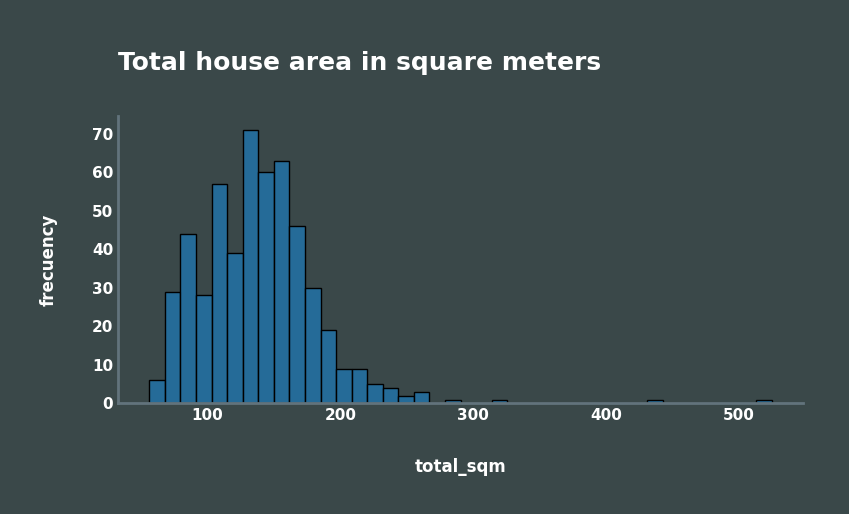

In [90]:
popular_neighborhoods = (
    boston
    .groupby('Neighborhood')
    .Id.count()
    .sort_values(ascending=False)
    .index
)[1:6]

df = (boston
    .loc[lambda df: df.Neighborhood.isin(popular_neighborhoods)]    
) 

(
    flow
    .hist(df,"total_sqm", style = "vox")
    .set_title("Total house area in square meters")
    # .color_by("Neighborhood")
    # .focus_on("CollgCr")
    .set_figsize(8,4)
    .show()
)


In [6]:
import matplotlib.pyplot as plt
plt.rcParamsDefault

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':